In [1]:
from bs4 import BeautifulSoup 
import re
import urllib 
import requests
import string
import pandas as pd
import seaborn as sn
% matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (17,8))

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

In [2]:
url = 'http://seinfeld.wikia.com/wiki/List_of_Seinfeld_sayings'

source_code = requests.get(url)
html = source_code.text
#print(html)

catch_phrases = re.findall(r'<b>(.*?)</b>', html)

clean_phrases = []
for phrase in catch_phrases:
    phrase = phrase.lower()
    clean_phrases.append(re.sub(r'<.*?>|\"', '', phrase))
print(clean_phrases)

['1st and 1st', 'anti-dentite', 'babka', 'baby', 'bad breaker-upper', 'baldist', 'boys', 'bottle wipe', 'cantstandya!', 'cartwright!', 'close talker', 'coffee table book about coffee tables', 'conjugal visit sex', 'costanza leave behind', 'coup de toe', 'delicate genius', 'double-dipper', 'dry heave set to music', 'even steven', 'festivus', 'fugitive sex', '“get out!”', 'getting upset', 'giddyup!', 'go!', 'gore-tex', 'hand sandwich', 'happy, pappy?', 'hello!', 'hello, newman', 'hello, vargas', 'high talker', 'hipster doofus', 'hoochie mama!', 'the human fund: money for people', 'i am aware', 'i was in the pool!', 'in the vault', "it's not you, it's me", 'john-john', 'kavorka', 'kibosh ', 'laughing and lying', 'low talker', 'lupus?! is it lupus?!', 'make-up sex', 'manssiere/bro', 'man hands', 'master of my domain', 'maybe the dingo ate your baby!', 'mimbo', 'moops', 'mulva', 'newman!', 'no soup for you!', "not that there's anything wrong with that", 'oh, moses, smell the roses!', 'oh, t

In [3]:
print(clean_phrases[-7])

yada yada yada


In [4]:
dialogue = pd.read_csv('C:\\Users\\Nate\\Documents\\GitHub\\CUNY_DATA_620_GROUP\\Final_Project\\Data\\Seinfield_DialogueSUBSET.csv')

In [5]:
print(dialogue.head())
print(dialogue.loc[:2,'Dialogue'])

  Character                                           Dialogue  DialogueIndex  \
0     JERRY  Do you know what this is all about? Do you kno...              1   
1     JERRY  (pointing at Georges shirt) See, to me, that b...              1   
2    GEORGE                                   Are you through?              2   
3     JERRY             You do of course try on, when you buy?              3   
4    GEORGE  Yes, it was purple, I liked it, I dont actuall...              4   

     SEID  SceneNum  
0  S01E00  S01E00_1  
1  S01E00  S01E00_2  
2  S01E00  S01E00_2  
3  S01E00  S01E00_2  
4  S01E00  S01E00_2  
0    Do you know what this is all about? Do you kno...
1    (pointing at Georges shirt) See, to me, that b...
2                                     Are you through?
Name: Dialogue, dtype: object


In [6]:
catch_dict = {}
for phrase in clean_phrases:
    utterances = 0 
    for row in dialogue.loc[:,'Dialogue']:
        row = str(row).lower() # not all rows are of type string
        utterances = utterances + len(re.findall(phrase, row))
        #if utterances > 0:
    #print("Matches found, " + str(phrase) + ': ' + str(utterances))
    catch_dict[phrase] = utterances
#print(catch_dict)
catch_df = pd.DataFrame.from_dict(catch_dict, orient='index')
catch_df.rename(columns={0: 'Count'}, inplace=True)
catch_df = catch_df.sort_values(by='Count',ascending=False)
print(catch_df.head(20))

                Count
baby              195
boys               65
go!                44
the tap            39
hello!             30
festivus           28
newman!            23
babka              20
who is this?       18
the move           15
soup nazi          15
moops              14
that's a shame     13
yada yada yada     12
make-up sex        11
serenity now!      10
mulva              10
shrinkage           9
pop-in              9
hello, newman       8


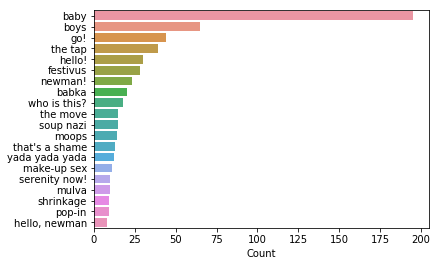

In [7]:
top20_catchs = catch_df.iloc[:20,:]
sn.barplot(x=top20_catchs.Count, y=top20_catchs.index)
plt.show()

In [8]:
utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'first and first', row))
        #if utterances > 0:
print("Matches found, " + 'first and first' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'regift', row))
        #if utterances > 0:
print("Matches found, " + 're-gift|re-gifter' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'schmoopie', row))
        #if utterances > 0:
print("Matches found, " + 'schmoopie' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'past the goalie', row))
        #if utterances > 0:
print("Matches found, " + 'past the goalie' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'pinkus', row))
        #if utterances > 0:
print("Matches found, " + 'pinkus' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'sweet fancy moses', row))
        #if utterances > 0:
print("Matches found, " + 'sweet fancy moses' + ': ' + str(utterances))


utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'the human fund', row))
        #if utterances > 0:
print("Matches found, " + 'the human fund' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'money for people', row))
        #if utterances > 0:
print("Matches found, " + 'money for people' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'the jerk store called', row))
        #if utterances > 0:
print("Matches found, " + 'the jerk store called' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'sex with the hen', row))
        #if utterances > 0:
print("Matches found, " + 'sex with the hen' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'lupus', row))
        #if utterances > 0:
print("Matches found, " + 'lupus' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'vile', row))
        #if utterances > 0:
print("Matches found, " + 'vile' + ': ' + str(utterances))


utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'vile weed', row))
        #if utterances > 0:
print("Matches found, " + 'vile weed' + ': ' + str(utterances))



utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'dipper', row))
        #if utterances > 0:
print("Matches found, " + 'dipper' + ': ' + str(utterances))


Matches found, first and first: 1
Matches found, re-gift|re-gifter: 5
Matches found, schmoopie: 0
Matches found, past the goalie: 1
Matches found, pinkus: 8
Matches found, sweet fancy moses: 2
Matches found, the human fund: 5
Matches found, money for people: 1
Matches found, the jerk store called: 3
Matches found, sex with the hen: 1
Matches found, lupus: 4
Matches found, vile: 5
Matches found, vile weed: 1
Matches found, dipper: 0


In [9]:
#with out exclaimation marks
no_excl_phrases = []
for phrase in clean_phrases:
    phrase = phrase.lower()
    no_excl_phrases.append(re.sub(r'!+', '', phrase))
print(no_excl_phrases)

['1st and 1st', 'anti-dentite', 'babka', 'baby', 'bad breaker-upper', 'baldist', 'boys', 'bottle wipe', 'cantstandya', 'cartwright', 'close talker', 'coffee table book about coffee tables', 'conjugal visit sex', 'costanza leave behind', 'coup de toe', 'delicate genius', 'double-dipper', 'dry heave set to music', 'even steven', 'festivus', 'fugitive sex', '“get out”', 'getting upset', 'giddyup', 'go', 'gore-tex', 'hand sandwich', 'happy, pappy?', 'hello', 'hello, newman', 'hello, vargas', 'high talker', 'hipster doofus', 'hoochie mama', 'the human fund: money for people', 'i am aware', 'i was in the pool', 'in the vault', "it's not you, it's me", 'john-john', 'kavorka', 'kibosh ', 'laughing and lying', 'low talker', 'lupus? is it lupus?', 'make-up sex', 'manssiere/bro', 'man hands', 'master of my domain', 'maybe the dingo ate your baby', 'mimbo', 'moops', 'mulva', 'newman', 'no soup for you', "not that there's anything wrong with that", 'oh, moses, smell the roses', 'oh, the humanity', 

In [10]:
for phrase in no_excl_phrases:
    utterances = 0 
    for row in dialogue.loc[:,'Dialogue']:
        row = str(row).lower() # not all rows are of type string
        utterances = utterances + len(re.findall(phrase, row))
        #if utterances > 0:
    print("Matches found, " + str(phrase) + ': ' + str(utterances))

Matches found, 1st and 1st: 0
Matches found, anti-dentite: 4
Matches found, babka: 20
Matches found, baby: 195
Matches found, bad breaker-upper: 0
Matches found, baldist: 1
Matches found, boys: 65
Matches found, bottle wipe: 0
Matches found, cantstandya: 0
Matches found, cartwright: 8
Matches found, close talker: 1
Matches found, coffee table book about coffee tables: 4
Matches found, conjugal visit sex: 2
Matches found, costanza leave behind: 0
Matches found, coup de toe: 0
Matches found, delicate genius: 5
Matches found, double-dipper: 0
Matches found, dry heave set to music: 1
Matches found, even steven: 2
Matches found, festivus: 28
Matches found, fugitive sex: 2
Matches found, “get out”: 0
Matches found, getting upset: 4
Matches found, giddyup: 7
Matches found, go: 10475
Matches found, gore-tex: 6
Matches found, hand sandwich: 1
Matches found, happy, pappy?: 3
Matches found, hello: 651
Matches found, hello, newman: 8
Matches found, hello, vargas: 0
Matches found, high talker: 4
Ma

In [12]:
writers = pd.read_csv('C:\\Users\\Nate\\Documents\\GitHub\\CUNY_DATA_620_GROUP\\Final_Project\\Data\\Seinfield_Writers.csv')
writers.head(10)

,Writers,SEID
0,Larry David,S01E00
1,Jerry Seinfeld,S01E00
2,Larry David,S01E01
3,Jerry Seinfeld,S01E01
4,Matt Goldman,S01E02
5,Larry David,S01E03
6,Jerry Seinfeld,S01E03
7,Larry David,S01E04
8,Jerry Seinfeld,S01E04
9,Larry David,S02E01


In [24]:
writer_dialogue = pd.merge(writers, dialogue, how='right',on=['SEID', 'SEID'])
writer_dialogue.tail(5)

,Writers,SEID,Character,Dialogue,DialogueIndex,SceneNum
84337,Larry David,S09E23,JERRY,Grand theft auto - don't steal any of my jokes.,7,S09E23_65
84338,Larry David,S09E23,PRISONER 3,You suck - I'm gonna cut you.,8,S09E23_65
84339,Larry David,S09E23,JERRY,"Hey, I don't come down to where you work, and ...",9,S09E23_65
84340,Larry David,S09E23,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",10,S09E23_65
84341,Larry David,S09E23,JERRY,"Alright, hey, you've been great! See you in th...",11,S09E23_65


In [28]:
writer_dialogue.head(6)

,Writers,SEID,Character,Dialogue,DialogueIndex,SceneNum
0,Larry David,S01E00,JERRY,Do you know what this is all about? Do you kno...,1,S01E00_1
1,Jerry Seinfeld,S01E00,JERRY,Do you know what this is all about? Do you kno...,1,S01E00_1
2,Larry David,S01E00,JERRY,"(pointing at Georges shirt) See, to me, that b...",1,S01E00_2
3,Jerry Seinfeld,S01E00,JERRY,"(pointing at Georges shirt) See, to me, that b...",1,S01E00_2
4,Larry David,S01E00,GEORGE,Are you through?,2,S01E00_2
5,Jerry Seinfeld,S01E00,GEORGE,Are you through?,2,S01E00_2


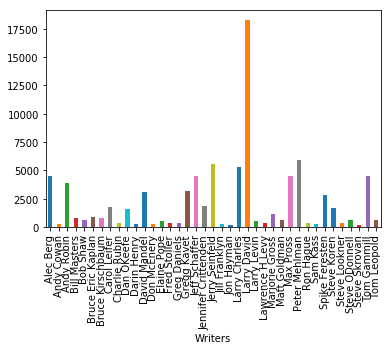

In [23]:
# adapted from https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

writer_dialogue.groupby('Writers').SEID.count().plot.bar(ylim=0)
plt.show()

We can see that Larry David contributed to more lines of dialogue than any other writer in the series.

In [35]:
larry_david_episode = writer_dialogue.loc[writer_dialogue['Writers'] == 'Larry David']
larry_david_episode
writer_dialogue['LD_episode'] = writer_dialogue.SEID.isin(larry_david_episode.SEID)
print(writer_dialogue.head())

          Writers    SEID Character  \
0     Larry David  S01E00     JERRY   
1  Jerry Seinfeld  S01E00     JERRY   
2     Larry David  S01E00     JERRY   
3  Jerry Seinfeld  S01E00     JERRY   
4     Larry David  S01E00    GEORGE   

                                            Dialogue  DialogueIndex  SceneNum  \
0  Do you know what this is all about? Do you kno...              1  S01E00_1   
1  Do you know what this is all about? Do you kno...              1  S01E00_1   
2  (pointing at Georges shirt) See, to me, that b...              1  S01E00_2   
3  (pointing at Georges shirt) See, to me, that b...              1  S01E00_2   
4                                   Are you through?              2  S01E00_2   

   LD_episode  
0        True  
1        True  
2        True  
3        True  
4        True  


In [36]:
clean_data = writer_dialogue.loc[:,['LD_episode','Dialogue']].drop_duplicates()
clean_data.head()

,LD_episode,Dialogue
0,True,Do you know what this is all about? Do you kno...
2,True,"(pointing at Georges shirt) See, to me, that b..."
4,True,Are you through?
6,True,"You do of course try on, when you buy?"
8,True,"Yes, it was purple, I liked it, I dont actuall..."


0.33886954740937947


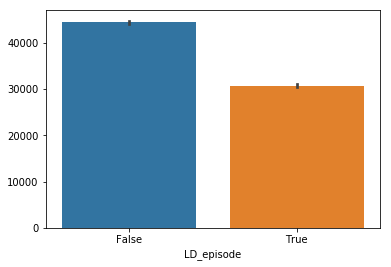

In [42]:
print(len(clean_data.loc[clean_data['LD_episode'] == True])/len(clean_data.index))
sn.barplot(x=clean_data.LD_episode, y=clean_data.index)
plt.show()

Larry David contributed to 33.9% of the dialogue in Seinfield. Though still uneven, a machine learning algorithm may have a better time distinguishing if Larry David contributed to an episode or not than idenitfying individual writers of the show. This doesn't address the problem that Larry David co-wrote a large amount of shows with Jerry Seinfield.